<center>
    <img src="https://weclouddata.s3.amazonaws.com/images/logos/wcd_logo_new_2.png" width='30%'> 
</center>

----------
<br>
<center align="left"> <font size='4'>  Developed by: </font><font size='4' color='#33AAFBD'>WeCloudData</font></center>
<br>


<h2 align="left"> Client Project: The OWL Solutions</h2>


<h4 align="left">Goal:</h4> <p> Predict the weekly the quantity ordered - [ctdped] for next 12 weeks – [fechafact] per product - [material] by distribution centre - [centro]</p>

<lef align="left"> <font size='3'> Kamel Chehboun</font></left>
<br>
<br>

<table style="horizontal-align:left;margin-left:0;text-align:left">
  <tr>
    <th></th>
    <th style="text-align:center;font-size:14px;color:blue">Next tasks</th>
  </tr>
  <tr>
    <td style="text-align:left;font-size:13px;color:blue">EDA</td>
    <td style="text-align:left;font-size:14px">Review Feature selection and validate with Miguel.<br>
    Validate dataset subsetting with Miguel.<br>
 Checking for Outliers.
    </td>
  </tr>
  <tr>
    <td style="text-align:left;font-size:13px;color:blue">ML</td>
    <td style="text-align:left;font-size:14px"> <span style="color:red"> Exploring Negative R2 scores obtained from preliminary ML</span><br>Testing Transformers and hyperameters.<br> 
        Exploring further algorithms.<br> 
 Creating Pipeline for cross-validation<br> 
Extend ML modeling to run for the entire dataset -cliendata (DC*material).<br> Explaining negative values for </td>
  </tr>
    <tr>
    <td style="text-align:left;font-size:13px;color:blue">Visualization</td>
    <td style="text-align:left;font-size:14px">Getting predictions for the entire dataset -cliendata (DC*material).</td>
  </tr>
</table>


## Importing packages

In [6]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from datetime import *

In [7]:
data = pd.read_csv('clientdata.csv')

## Exploratory Data Analysis and Preliminary Predictions (Work in Progress)

In [8]:
print(data.shape)
data.head(2)

(252389, 31)


,centro,denomcentro,material,denominacionmaterial,clasepedido,pedido,docvtas,posicion,posicion2,montoiva,...,categoria,subcategoria,submarca,sublinea,ctdfact,ctdped,valorneto,valorneto2,fechafact,fepedcpas
0,MT15,CD Guadalajara TMLUC_MX,1046148,Beb. ZUKO Sandia E/S 12-8x15g.,ZDSD - Pedido Mobile,PA1239509171739005,7150642380,300.0,300.0,5928.32,...,Bebidas instantßneas frφas,Jugos instantaneos frios,Zuko Regular,Regular,150,150,37052.00,37052.00,2020-09-23,17.09.2020
1,MT15,CD Guadalajara TMLUC_MX,1046147,Beb. ZUKO Guanabana E/S 12-8x15g.,ZDSD - Pedido Mobile,PA1239509171739005,7150642380,400.0,400.0,7904.43,...,Bebidas instantßneas frφas,Jugos instantaneos frios,Zuko Regular,Regular,200,200,49402.67,49402.67,2020-09-23,17.09.2020


#### Features Dictionary (Meeting Date: 26/01/2021)

clasepedido:	ZVNC - Sol.NotaCrΘd	Type of orders

pedido:	1610052289	SOID	Sales Orders
docvtas:	7150638131		

ctdped:	1	Qty	Function
ctdfact:	1	Qty	Invoice

posicion:	1102	Line Item Position	
posicion2:	1102	Line Item Position	

valorneto:	-484.6	SalesOrder Amount	
valorneto2:	-484.6	Invoice Amount	

montoiva:	77.54	Taxes	
montoieps:	0	Taxes	

material:	1046017	ProductID
denominacionmaterial:	Beb. ZUKO Melon E/S 96x15g.	Product Description
marca:	Zuko	Product Brand
linea:	Regular	Other categories
categoria:	Bebidas instantßneas frφas	Other categories
subcategoria:	Jugos instantaneos frios	Other categories
submarca:	Zuko Regular	Other categories
sublinea:	Regular	Other categories

jquiaproductor:	4.53E+17

centro:	        MT25	DC
denomcentro:	CD Hermosillo TMLUC_MX	DC Name

codsolic:	10789045	Client place de order (HQ)
solicitante:	LEY AUTOS HERMOSILLO BEBIDAS	
coddestin:	10789045	Client destination where products are sent
destinatariomercancia:	LEY AUTOS HERMOSILLO BEBIDAS	

fepedcpas:	17.09.2020	Sales Order ENTRY DATE
fechafact:	18.09.2020	Invoice Date = When product is delivered = client requierement |Only use record with invoice date

denomire:	SONORA	Address
calledestinmcia:	CARR HERMOSILLO-BAHIA DE KINO	Address
poblacian:	HERMOSILLO	Address



#### Features removed

In [9]:
# Removing solicitante, coddestin, and destinatariomercancia as contain the same information as codsolic: Client address.
data.drop(['solicitante'],axis=1,inplace=True)
data.drop(['coddestin'],axis=1,inplace=True)
data.drop(['destinatariomercancia'],axis=1,inplace=True)

# Removing denomcentro as duplicate of centro: DC identification.
data.drop(['denomcentro'],axis=1,inplace=True)

# Removing denominacionmaterial as contain the same information as material: Product Identification identification.
data.drop(['denominacionmaterial'],axis=1,inplace=True)

### Categorical Features

In [10]:
categorical=data.select_dtypes(include='object')
print(categorical.shape)
categorical.head(2)

(252389, 16)


,centro,clasepedido,pedido,montoiva,montoieps,marca,codsolic,denomire,calledestinmcia,poblacian,linea,categoria,subcategoria,submarca,sublinea,fepedcpas
0,MT15,ZDSD - Pedido Mobile,PA1239509171739005,5928.32,0,Zuko,10788989,JALISCO,AV COLON 666-A,ZAPOTLAN EL GRANDE,Regular,Bebidas instantßneas frφas,Jugos instantaneos frios,Zuko Regular,Regular,17.09.2020
1,MT15,ZDSD - Pedido Mobile,PA1239509171739005,7904.43,0,Zuko,10788989,JALISCO,AV COLON 666-A,ZAPOTLAN EL GRANDE,Regular,Bebidas instantßneas frφas,Jugos instantaneos frios,Zuko Regular,Regular,17.09.2020


In [11]:
data['centro'] = data['centro'].str.replace(' ', '')

In [12]:
categorical.nunique()

centro                33
clasepedido           12
pedido             29365
montoiva            9147
montoieps           7894
marca                 23
codsolic            1546
denomire              70
calledestinmcia     2012
poblacian            552
linea                 43
categoria             11
subcategoria          17
submarca              88
sublinea              64
fepedcpas            421
dtype: int64

In [13]:
categorical.isna().sum()

centro                  0
clasepedido             0
pedido                  0
montoiva           149960
montoieps          149960
marca                   0
codsolic                0
denomire              551
calledestinmcia       551
poblacian             551
linea              149960
categoria          149960
subcategoria       149960
submarca           149960
sublinea           149960
fepedcpas               0
dtype: int64

In [14]:
# Replacing missing values with zero
categorical=categorical.fillna(0)

###  Numeric features
numericdata=data.select_dtypes(exclude='object').keys().tolist()
data[numericdata]=data[numericdata].fillna(0)
data[numericdata]

In [15]:
# List of Numeric features
numericdata=data.select_dtypes(exclude='object')
print(numericdata.shape)
numericdata.head(2)

(252389, 10)


,material,docvtas,posicion,posicion2,jquiaproductor,ctdfact,ctdped,valorneto,valorneto2,fechafact
0,1046148,7150642380,300.0,300.0,4.530000e+17,150,150,37052.00,37052.00,2020-09-23
1,1046147,7150642380,400.0,400.0,4.530000e+17,200,200,49402.67,49402.67,2020-09-23


In [16]:
numericdata.nunique()

material            307
docvtas           30115
posicion            357
posicion2           357
jquiaproductor       15
ctdfact             659
ctdped              891
valorneto         25963
valorneto2        27034
fechafact           322
dtype: int64

In [17]:
numericdata.keys().to_list()

['material',
 'docvtas',
 'posicion',
 'posicion2',
 'jquiaproductor',
 'ctdfact',
 'ctdped',
 'valorneto',
 'valorneto2',
 'fechafact']

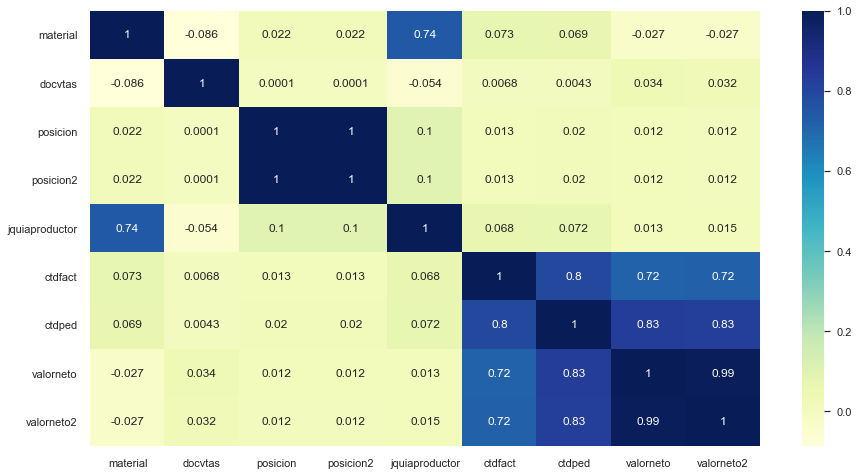

In [18]:
sns.set(font_scale=1)
plt.figure(figsize=(15,8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(numericdata.corr(),cmap="YlGnBu", annot=True);

#### Numeric features removed

In [19]:
# Removing ctdfact, valometo2 as strongly correlated with ctdped and valometo, respectively.
data.drop(['ctdfact'],axis=1,inplace=True)
data.drop(['valorneto2'],axis=1,inplace=True)

# Removing posicion2 as strongly correlated with posicion.
data.drop(['posicion2'],axis=1,inplace=True)

### Features Engineering

In [20]:
dates=data['fechafact'].value_counts().index
# Converting fechafact to datetime
import datetime as dt
data['fechafact']=pd.to_datetime(data['fechafact'])

In [21]:
data['week']=data['fechafact'].dt.week
data['year']=data['fechafact'].dt.year

In [22]:
# Features retained for modeling:
retained_features=data.keys().to_list()
retained_features

['centro',
 'material',
 'clasepedido',
 'pedido',
 'docvtas',
 'posicion',
 'montoiva',
 'montoieps',
 'marca',
 'codsolic',
 'denomire',
 'calledestinmcia',
 'poblacian',
 'jquiaproductor',
 'linea',
 'categoria',
 'subcategoria',
 'submarca',
 'sublinea',
 'ctdped',
 'valorneto',
 'fechafact',
 'fepedcpas',
 'week',
 'year']

In [23]:
data['clasepedido'] = data['clasepedido'].str.replace(' ', '')
data['marca'] = data['marca'].str.replace(' ', '')
data['categoria'] = data['categoria'].str.replace(' ', '')
data['linea'] = data['linea'].str.replace(' ', '')

In [24]:
# One hot encoding of nominal variables
nominal = ['clasepedido','marca','categoria','linea']
dataset = pd.get_dummies(data,columns=nominal, drop_first=True)

dataset.shape

(252389, 71)

In [48]:
# Grouping the dataset by material within each DC and sorted by week.
dataset = dataset.groupby(['centro', 'material','year','week'], as_index=False).sum()
print(dataset.shape)
dataset.head(3)

(59822, 59)


,centro,material,year,week,docvtas,posicion,jquiaproductor,ctdped,valorneto,clasepedido_ZDBR-Dev.BuenEstad,...,linea_Pastatradicional,linea_Recubiertasdechocolate,linea_Recubiertos,linea_Regular,linea_Sabila,linea_S≤lidas,linea_S├│lidas,linea_Telight,linea_Teregular,linea_Yupi
0,MT15,1011397,2020,3,50003113124,0.0,9.800000e+17,68,60487.92,0,...,0,0,0,0,0,0,0,0,0,0
1,MT15,1011397,2020,4,28574199406,0.0,5.600000e+17,18,16082.46,0,...,0,0,0,0,0,0,0,0,0,0
2,MT15,1011397,2020,5,107155712498,0.0,2.100000e+18,128,112800.58,1,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# Dealing with duplicates:
data_dup = dataset[dataset.duplicated(keep="last")]
print('Duplicates: ',data_dup.shape)

Duplicates:  (0, 59)


In [49]:
# Imputing missing values with zero
dataset=dataset.fillna(0)

### Checking for discontinuous material movement per DC

In [50]:
# Product availability (Weeks per year)
def mvt_freq(period):
    weekscount = dataset.groupby(['centro', 'material','year'], as_index=False).agg(
    {'week':['count']})
    weekscount.columns = weekscount.columns.droplevel(1)
    weekscount=weekscount.loc[weekscount['year'] == period]
    weekscount=weekscount.pivot(index='material', columns='centro', values='week').dropna(axis='columns',thresh=0)
    return weekscount

In [29]:
# Product availability in 2020
mvt_freq(2020)

centro,MT15,MT20,MT21,MT22,MT23,MT24,MT25,MT26,MT27,MT28,MT50,MT51,MT52,MT53,MT54,MT55,MT59,MT60,MT61
material,,,,,,,,,,,,,,,,,,,
1011397,50.0,52.0,NaN,33.0,48.0,43.0,27.0,23.0,43.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011398,50.0,52.0,27.0,42.0,47.0,48.0,24.0,30.0,32.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011432,50.0,52.0,29.0,43.0,49.0,46.0,38.0,43.0,43.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011434,49.0,50.0,3.0,38.0,43.0,44.0,21.0,21.0,34.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011448,52.0,52.0,50.0,42.0,49.0,43.0,40.0,45.0,39.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048973,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048974,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048975,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# Product availability in 2021
mvt_freq(2021)

centro,MT15,MT20,MT21,MT22,MT23,MT24,MT25,MT26,MT27,MT28,MT53,MT54,MT61
material,,,,,,,,,,,,,
1011397,2.0,1.0,NaN,3.0,NaN,2.0,2.0,2.0,NaN,2.0,NaN,NaN,NaN
1011398,2.0,2.0,1.0,2.0,3.0,3.0,1.0,2.0,2.0,3.0,NaN,NaN,NaN
1011432,3.0,3.0,1.0,3.0,3.0,3.0,3.0,2.0,2.0,3.0,NaN,NaN,NaN
1011434,3.0,3.0,NaN,2.0,3.0,3.0,1.0,2.0,2.0,3.0,NaN,NaN,NaN
1011448,3.0,3.0,3.0,2.0,3.0,1.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048974,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048975,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1050541,NaN,NaN,2.0,2.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN


### Modeling dataset for training

In [51]:
def subset4prediction(centro,material):
    subset=dataset.loc[dataset['centro'] == str(centro)][dataset['material']==material]
    subset_years=subset['year'].value_counts().index.tolist()
    for i in range(0,len(subset_years)):
        thisdate=pd.datetime.now().date()
        thisyear=pd.datetime.now().year
        if subset_years[i] == thisyear:
            weeknum=thisdate.strftime("%V")
        else:
            weeknum=date(pd.datetime.now().year, 12, 28).isocalendar()[1]
        week_list=[]
        for w in range(1, int(weeknum)):
            w=int(w)
            week_list.append(w)
        #week=int(subset['week'][i])
        subset_weeks=subset.loc[subset['year'] == int(subset_years[i])]
        subset_weeks=subset_weeks['week'].value_counts().index.tolist()
        s = set(subset_weeks)
        missing_weeks = [x for x in week_list if x not in s]
        df=pd.DataFrame(index=np.arange(len(missing_weeks)), columns=subset.columns.tolist())
        for j in range(len(df)):
            df.loc[j,'week'] = missing_weeks[j]
            df.loc[j,'year'] = subset_years[i]
            df.loc[j,'centro'] = centro
            df.loc[j,'material'] = material
        subset=subset.append(df) 
    subset=subset.sort_values(by=['year','week']).fillna(0)
    subset.reset_index(drop=True, inplace=True)
    weeks2predict = int(12)
    subset['ctdped_prediction']=subset['ctdped'].shift(-weeks2predict)
    drop_cols = subset.columns[(subset == 0).sum() > 0.75*subset.shape[1]]
    subset.drop(drop_cols, axis = 1, inplace = True) 
    return subset

In [52]:
#Testing for ('MT15',1011397)
subsettopredict=subset4prediction('MT15',1011397)
subsettopredict.head(13)

<ipython-input-51-23e3b986f4fb>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset=dataset.loc[dataset['centro'] == str(centro)][dataset['material']==material]
<ipython-input-51-23e3b986f4fb>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  thisdate=pd.datetime.now().date()
<ipython-input-51-23e3b986f4fb>:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  thisyear=pd.datetime.now().year
<ipython-input-51-23e3b986f4fb>:10: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  weeknum=date(pd.datetime.now().year, 12, 28).isocalendar()[1]


,centro,material,year,week,docvtas,posicion,jquiaproductor,ctdped,valorneto,clasepedido_ZDSD-PedidoMobile,marca_Nucita,categoria_Golosinas,linea_S≤lidas,ctdped_prediction
0,MT15,1011397,2020,1,0,0.0,0.000000e+00,0,0.00,0,0,0,0,48.0
1,MT15,1011397,2020,2,0,0.0,0.000000e+00,0,0.00,0,0,0,0,77.0
2,MT15,1011397,2020,3,50003113124,0.0,9.800000e+17,68,60487.92,7,7,0,0,50.0
3,MT15,1011397,2020,4,28574199406,0.0,5.600000e+17,18,16082.46,4,4,0,0,5.0
4,MT15,1011397,2020,5,107155712498,0.0,2.100000e+18,128,112800.58,14,15,0,0,0.0
5,MT15,1011397,2020,6,21431436277,0.0,4.200000e+17,9,7862.54,3,3,0,0,15.0
6,MT15,1011397,2020,7,21432464847,0.0,4.200000e+17,12,10721.64,3,3,0,0,7.0
7,MT15,1011397,2020,8,78587465066,0.0,1.540000e+18,138,121511.91,9,11,0,0,7.0
8,MT15,1011397,2020,9,78590358901,0.0,1.540000e+18,112,99398.53,10,11,0,0,28.0
9,MT15,1011397,2020,10,28579674490,0.0,5.600000e+17,40,34577.29,4,4,0,0,105.0


### Machine Learning Models Evaluation for ('MT28',1046149)

Next tasks:
- Reviewing Features selection and Engineering.
- Searching for best hyper-parameters. 

#### - Preliminary assessment of features importances for one material within one DC

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


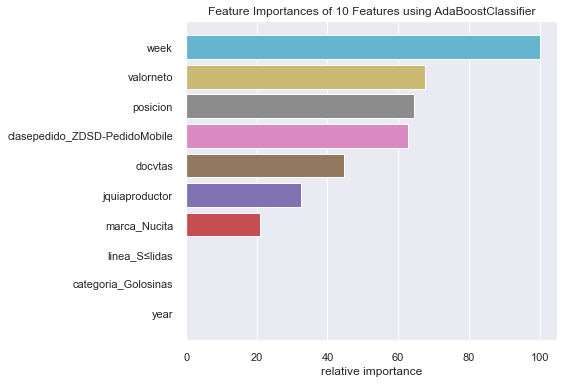

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


FeatureImportances(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001E35EB55B20>,
                   model=None)

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from yellowbrick.model_selection import feature_importances

# creating X,y set
X = subsettopredict.drop(['centro','material','ctdped','ctdped_prediction'],1)
y=subsettopredict['ctdped_prediction']

weeks2predict = int(12)
X = X[:-weeks2predict].fillna(0) 
y = y[:-weeks2predict]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)

feature_importances(AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),random_state=42), X_train, y_train)

### Exploratory Machine Learning
- Applying few algorithms with default parameters.

In [ ]:
# Importing sklearn packages

from sklearn.linear_model import *
import sklearn.linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,StackingClassifier
from xgboost import XGBClassifier,XGBRegressor


from sklearn.metrics import r2_score

#### - DecisionTreeClassifier Algorithm

In [62]:
model = KNeighborsClassifier()

# Fitting the training set
knn=model.fit(X_train, y_train)
print('Training Variance score: %.2f' % r2_score(y_train, knn.predict(X_train)))
print('Test Variance score: %.2f' % r2_score(y_test, knn.predict(X_test)))

Training Variance score: -0.66
Test Variance score: -0.25


#### - AdaBoostClassifier Algorithm

In [55]:
model = AdaBoostClassifier()

# Fitting the training set
ada=model.fit(X_train, y_train)
print('Training Variance score: %.2f' % r2_score(y_train, ada.predict(X_train)))
print('Test Variance score: %.2f' % r2_score(y_test, ada.predict(X_test)))

Training Variance score: -0.40
Test Variance score: 0.05


#### - XGB Regressor Algorithm

In [56]:
model = AdaBoostClassifier()

# Fitting the training set
xgb=model.fit(X_train, y_train)
print('Training Variance score: %.2f' % r2_score(y_train, xgb.predict(X_train)))
print('Test Variance score: %.2f' % r2_score(y_test, xgb.predict(X_test)))

Training Variance score: -0.39
Test Variance score: -0.04


### Visualizing predictions for one material within one DC

In [39]:
weeks2predict = int(12)
prediction = np.around(xgb.predict(X[-weeks2predict:])).astype(int)
#prediction=[int(prediction) for prediction in prediction]
prediction = pd.DataFrame(prediction)
prediction.rename(columns = {0: 'ctdped_predicted'}, inplace=True)
ctdped_predicted = subsettopredict[-weeks2predict:] 
ctdped_predicted.reset_index(inplace = True)
prediction_table=ctdped_predicted.join(prediction)

prediction_table=prediction_table[['centro','material','year','week','ctdped','ctdped_predicted']]
index = pd.MultiIndex.from_tuples(list(
     zip(*[prediction_table['year'].values.tolist(),prediction_table['week'].values.tolist(),])), names=["year", "week"])
df = pd.DataFrame(prediction_table['ctdped_predicted'].to_numpy(), index=index,columns=prediction_table['material'].unique().tolist()).T
df

year    2020                         2021             
week      47  48  49  50  51  52  53   1   2  3  4  5 
1011397   29  15  15  15  58  15  15   15  15  0  0  0